In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import scipy.stats
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import statistics
%matplotlib inline
import sklearn
from collections import Counter
import itertools
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
df = pd.read_csv("LIDC with IH(Mis_fre).csv")
#df = pd.read_csv("Copy of LIDC dataset with full annotations.csv")
#medoid = pd.read_csv("medoids.csv")

In [7]:
df.head()

,Unnamed: 0,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,...,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,Malignancy_mode,IH
0,0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,...,5,4,3,3,3,3,3,2,5,0.000000
1,1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,...,3,4,3,3,2,3,3,2,5,0.000000
2,2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,...,3,2,3,3,2,1,3,3,4,0.900000
3,3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,...,3,2,3,3,2,1,3,1,3,0.333333
4,4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,...,1,1,1,1,1,1,1,3,1,0.533333


In [18]:

df["Malignancy_mode"].value_counts()

3    330
2    153
1    119
4    114
5     99
Name: Malignancy_mode, dtype: int64

In [6]:
X = df.drop(["noduleID",'Malignancy_1', 'Malignancy_2', 'Malignancy_3', 'Malignancy_4',
    "Malignancy3_1", 'Malignancy3_2', "Malignancy3_3", "Malignancy3_4", "Malignancy3_mode", "Propagation"], axis=1)
X = X.as_matrix()

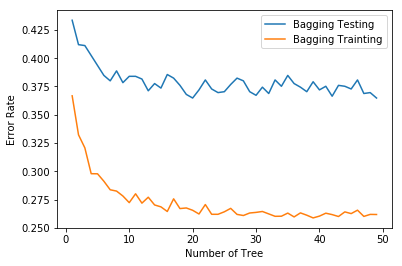

In [12]:
# min_samples_split = 2  min_samples_leaf = 1
y_all = df[['Malignancy_1', 'Malignancy_2', 'Malignancy_3', 'Malignancy_4']]
y_all = y_all.as_matrix()
y_allt = np.transpose(y_all)
np.random.shuffle(y_allt)
y_all = np.transpose(y_allt)
y = y_all.T[0]
    
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

train_indexs = []
test_indexs = []
    

for train_index, test_index in skf.split(X, y):  
    train_indexs.append(train_index)
    test_indexs.append(test_index)

y_all_train = y_all[train_indexs[0]]
y_all_test = y_all[test_indexs[0]]
    
X_train = X[train_indexs[0]]
X_test = X[test_indexs[0]]

    
##First Iteration

y_train1 = np.zeros(y[train_indexs[0]].shape[0])
y_test1 = np.zeros(y[test_indexs[0]].shape[0])
    
#train
n = 0
for index in train_indexs[0]:
    y_train1[n] = y_all[index][0]
    n += 1 
     
#test
n = 0
for index in test_indexs[0]:
    y_test1[n] = y_all[index][0]
    n += 1



BaggingTestE = []
BaggingTrainE = []
for numbers_tree in range(1, 50):
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train1_balanced = sm.fit_sample(X_train, y_train1)
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = 5), n_estimators = numbers_tree, max_samples = 0.632)

    cv_results = cross_validate(bagging, X_train_balanced, y_train1_balanced, cv=10, return_train_score=True)
    

    BaggingTrainE.append(1-cv_results['train_score'].mean())
    BaggingTestE.append(1-cv_results['test_score'].mean())
    
plt.plot(range(1, 50), BaggingTestE)
plt.plot(range(1, 50), BaggingTrainE)
plt.legend(('Bagging Testing','Bagging Training'))
plt.ylabel('Error Rate')
plt.xlabel('Number of Tree')
plt.show()

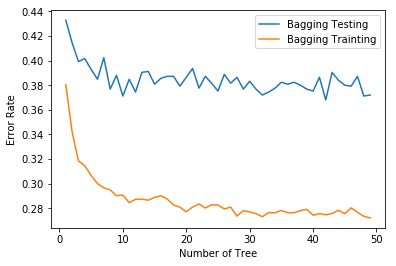

In [13]:
BaggingTestE = []
BaggingTrainE = []
for numbers_tree in range(1, 50):
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train1_balanced = sm.fit_sample(X_train, y_train1)
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 10, min_samples_leaf = 5),
                                n_estimators = numbers_tree, max_samples = 0.632)

    cv_results = cross_validate(bagging, X_train_balanced, y_train1_balanced, cv=10, return_train_score=True)
    

    BaggingTrainE.append(1-cv_results['train_score'].mean())
    BaggingTestE.append(1-cv_results['test_score'].mean())
    
plt.plot(range(1, 50), BaggingTestE)
plt.plot(range(1, 50), BaggingTrainE)
plt.legend(('Bagging Testing','Bagging Training'))
plt.ylabel('Error Rate')
plt.xlabel('Number of Tree')
plt.show()

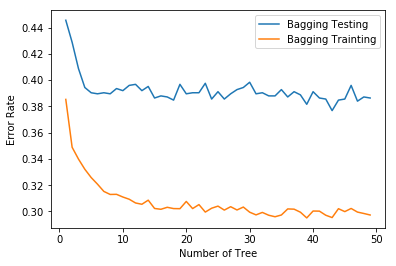

In [14]:
BaggingTestE = []
BaggingTrainE = []
for numbers_tree in range(1, 50):
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train1_balanced = sm.fit_sample(X_train, y_train1)
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 20, min_samples_leaf = 10),
                                n_estimators = numbers_tree, max_samples = 0.632)

    cv_results = cross_validate(bagging, X_train_balanced, y_train1_balanced, cv=10, return_train_score=True)
    

    BaggingTrainE.append(1-cv_results['train_score'].mean())
    BaggingTestE.append(1-cv_results['test_score'].mean())
    
plt.plot(range(1, 50), BaggingTestE)
plt.plot(range(1, 50), BaggingTrainE)
plt.legend(('Bagging Testing','Bagging Training'))
plt.ylabel('Error Rate')
plt.xlabel('Number of Tree')
plt.show()

# Calculation of Instance Hardness (Error Variance)

In [24]:
#have 20 versions of labels
number  = 1

train_acc1 = []
test_acc1 = []
noftree1 = []

train_acc2 = []
test_acc2 = []
noftree2 = []

train_acc3 = []
test_acc3 = []
noftree3 = []

train_acc4 = []
test_acc4 = []
noftree4 = []

train_acc1_classes = []
train_acc2_classes = []
train_acc3_classes = []
train_acc4_classes = []

train_sen1_classes = []
train_sen2_classes = []
train_sen3_classes = []
train_sen4_classes = []

train_spe1_classes = []
train_spe2_classes = []
train_spe3_classes = []
train_spe4_classes = []

test_acc1_classes = []
test_acc2_classes = []
test_acc3_classes = []
test_acc4_classes = []

test_sen1_classes = []
test_sen2_classes = []
test_sen3_classes = []
test_sen4_classes = []

test_spe1_classes = []
test_spe2_classes = []
test_spe3_classes = []
test_spe4_classes = []
  

depth = 5
noftree_s = 20
noftree_e = 40
noftree_n = noftree_e - noftree_s


cost1 = []
cost2 = []
cost3 = []
cost4 = []

all_variance = {}
for index in df.index:
    all_variance[index] = 0

while number <= 20 :
    number += 1
    
    y_all = df[['Malignancy_1', 'Malignancy_2', 'Malignancy_3', 'Malignancy_4']]
    y_all = y_all.as_matrix()
    y_allt = np.transpose(y_all)
    np.random.shuffle(y_allt)
    y_all = np.transpose(y_allt)
    y = y_all.T[0]
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

    train_indexs = []
    test_indexs = []
    

    for train_index, test_index in skf.split(X, y):  
        train_indexs.append(train_index)
        test_indexs.append(test_index)
    
    X_train = X[train_indexs[0]]
    X_test = X[test_indexs[0]]
    
    #min_max_scaler = preprocessing.MinMaxScaler()
    #min_max_scaler.fit(X_train)
    #X_train = min_max_scaler.fit_transform(X_train)
    #X_test = min_max_scaler.fit_transform(X_test)
    
    y_all_train = y_all[train_indexs[0]]
    y_all_test = y_all[test_indexs[0]]
    
    ##First Iteration

    y_train1 = np.zeros(y[train_indexs[0]].shape[0])
    y_test1 = np.zeros(y[test_indexs[0]].shape[0])
    
    #train
    n = 0
    for index in train_indexs[0]:
        y_train1[n] = y_all[index][0]
        n += 1 
     
    #test
    n = 0
    for index in test_indexs[0]:
        y_test1[n] = y_all[index][0]
        n += 1
        
    #Predction
    #Balance
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train1_balanced = sm.fit_sample(X_train, y_train1)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train1_balanced)
    noftree1.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_1 = []
    mis_test_1 = []
    
    bagging.fit(X_train_balanced,y_train1_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc1.append(accuracy_score(y_train1, bagging_train_pred))
    test_acc1.append(accuracy_score(y_test1, bagging_test_pred))
    
    #train
    cm = confusion_matrix(y_train1, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc1_classes.append(train_acc_class)
    train_sen1_classes.append(train_sen_class)
    train_spe1_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test1, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc1_classes.append(test_acc_class)
    test_sen1_classes.append(test_sen_class)
    test_spe1_classes.append(test_spe_class)  

    #calculate errors
    mis_train_error_1 = abs(y_train1 - bagging_train_pred)
    mis_test_error_1 = abs(y_test1 - bagging_test_pred)
        
    #track
    #train
    for i, j in zip(mis_train_error_1, train_indexs[0]):
        if i != 0:
            mis_train_1.append(j) 
    
    #test
    for i, j in zip(mis_test_error_1, test_indexs[0]):
        if i != 0:
            mis_test_1.append(j)

    cost1.append(len(mis_train_1)+len(mis_test_1))
    
    ##Second Iteration
    
    #Update labels
    
    y_train2 = np.zeros(y[train_indexs[0]].shape[0])
    y_test2 = np.zeros(y[test_indexs[0]].shape[0])

    #train
    n = 0
    for a, b in zip(mis_train_error_1, y_all_train):                                
        if a != 0:
            y_train2[n] = int((b[0] + b[1])/2)
        else:
            y_train2[n] = y_train1[n]
        n += 1   
    
    #test
    n = 0
    for a, b in zip(mis_test_error_1, y_all_test):                                
        if a != 0:
            y_test2[n] = int((b[0] + b[1])/2)
        else:
            y_test2[n] = y_test1[n]
        n += 1           
    
    
    #Predction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train2_balanced = sm.fit_sample(X_train, y_train2)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train2_balanced)
    noftree2.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_2 = []
    mis_test_2 = []
    
    bagging.fit(X_train_balanced,y_train2_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc2.append(accuracy_score(y_train2, bagging_train_pred))
    test_acc2.append(accuracy_score(y_test2, bagging_test_pred))
    
    #train
    cm = confusion_matrix(y_train2, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc2_classes.append(train_acc_class)
    train_sen2_classes.append(train_sen_class)
    train_spe2_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test2, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc2_classes.append(test_acc_class)
    test_sen2_classes.append(test_sen_class)
    test_spe2_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_2 = abs(y_train2 - bagging_train_pred)
    mis_test_error_2 = abs(y_test2 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_2, train_indexs[0]):
        if j not in mis_train_1:
            mis_train_error_2[c] = 0
            mis_train_error_1[c] = i
        c += 1
        
    c = 0
    for i, j in zip(mis_test_error_2, test_indexs[0]):
        if j not in mis_test_1:
            mis_test_error_2[c] = 0
            mis_test_error_1[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_2, train_indexs[0]):
        if i != 0:
            mis_train_2.append(j)
    
    #test
    for i, j in zip(mis_test_error_2, test_indexs[0]):
        if i != 0:
            mis_test_2.append(j)

    cost2.append(len(mis_train_2)+len(mis_test_2))
        
    ##Third Iteration
    
    #Update labels
    
    y_train3 = np.zeros(y[train_indexs[0]].shape[0])
    y_test3 = np.zeros(y[test_indexs[0]].shape[0])  
  
    #train
    n = 0
    for a, b, c in zip(mis_train_error_2, y_all_train, train_indexs[0]):                                
        if a != 0:
            #3 labels
            if c in mis_train_1 and c in mis_train_2:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train3[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train3[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            #2 labels
            else:
                y_train3[n] = int((b[0] + b[1])/2)
        else:
            y_train3[n] = y_train2[n]
        n += 1  
    
    #test
    n = 0
    for a, b, c in zip(mis_test_error_2, y_all_test, test_indexs[0]):                                
        if a != 0:
            #3 labels
            if c in mis_test_1 and c in mis_test_2:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test3[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test3[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            #2 labels
            else:
                y_test3[n] = int((b[0] + b[1])/2)
        else:
            y_test3[n] = y_test2[n]
        n += 1
    
    
    #Prediction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train3_balanced = sm.fit_sample(X_train, y_train3)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train3_balanced)
    noftree3.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_3 = []
    mis_test_3 = []
    
    bagging.fit(X_train_balanced,y_train3_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc3.append(accuracy_score(y_train3, bagging_train_pred))
    test_acc3.append(accuracy_score(y_test3, bagging_test_pred))

    #train
    cm = confusion_matrix(y_train3, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc3_classes.append(train_acc_class)
    train_sen3_classes.append(train_sen_class)
    train_spe3_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test3, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc3_classes.append(test_acc_class)
    test_sen3_classes.append(test_sen_class)
    test_spe3_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_3 = abs(y_train3 - bagging_train_pred)
    mis_test_error_3 = abs(y_test3 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_3, train_indexs[0]):
        if j not in mis_train_1 and j not in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_1[c] = i
        elif j not in mis_train_1 and j in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j not in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_2[c] = i
        c += 1
        
    c = 0
    for i, j in zip(mis_test_error_3, test_indexs[0]):
        if j not in mis_test_1 and j not in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_1[c] = i
        elif j not in mis_test_1 and j in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j not in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_2[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_3, train_indexs[0]):
        if i != 0:
            mis_train_3.append(j)
    
    #test
    for i, j in zip(mis_test_error_3, test_indexs[0]):
        if i != 0:
            mis_test_3.append(j)

    cost3.append(len(mis_train_3)+len(mis_test_3))

    ##Fourth Iteration
    
    #Update labels
   
    y_train4 = np.zeros(y[train_indexs[0]].shape[0])
    y_test4 = np.zeros(y[test_indexs[0]].shape[0])  

    #train
    n = 0
    for a, b, c in zip(mis_train_error_3, y_all_train, train_indexs[0]):                                
        if a != 0:
            #4 labels
            if c in mis_train_1 and c in mis_train_2 and c in mis_train_3:
                if b[3] == b[0] and b[1] == b[2]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[1] and b[0] == b[2]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[2] and b[0] == b[1]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] != b[0] and b[3] != b[1] and b[3] != b[2] and b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[3]),int(b[1]), int(b[2])])
            
            # 3 labels
            elif c in mis_train_1 and c in mis_train_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
                
            #3 labels
            elif c in mis_train_2 and c in mis_train_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])

            
            #2 labels
            else:
                y_train4[n] = int((b[0] + b[1])/2)
        else:
            y_train4[n] = y_train3[n]
        
        n += 1  

    
    #test
    n = 0
    for a, b, c in zip(mis_test_error_3, y_all_test, test_indexs[0]):                                
        if a != 0:
            #4 labels
            if c in mis_test_1 and c in mis_test_2 and c in mis_test_3:
                if b[3] == b[0] and b[1] == b[2]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[1] and b[0] == b[2]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[2] and b[0] == b[1]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] != b[0] and b[3] != b[1] and b[3] != b[2] and b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[3]),int(b[1]), int(b[2])])

            # 3 labels
            elif c in mis_test_1 and c in mis_test_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
                
            #3 labels
            elif c in mis_test_2 and c in mis_test_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
            #2 labels
            else:
                y_test4[n] = int((b[0] + b[1])/2)
        else:
            y_test4[n] = y_test3[n]
        
        n += 1  
   
    #Prediction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train4_balanced = sm.fit_sample(X_train, y_train4)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train4_balanced)
    noftree4.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_4 = []
    mis_test_4 = []
    
    bagging.fit(X_train_balanced,y_train4_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc4.append(accuracy_score(y_train4, bagging_train_pred))
    test_acc4.append(accuracy_score(y_test4, bagging_test_pred))

    #train
    cm = confusion_matrix(y_train4, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc4_classes.append(train_acc_class)
    train_sen4_classes.append(train_sen_class)
    train_spe4_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test4, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc4_classes.append(test_acc_class)
    test_sen4_classes.append(test_sen_class)
    test_spe4_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_4 = abs(y_train4 - bagging_train_pred)
    mis_test_error_4 = abs(y_test4 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_4, train_indexs[0]):
        if j not in mis_train_1 and j not in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_1[c] = i
        elif j in mis_train_1 and j not in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j not in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j not in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        c += 1
     
    c = 0
    for i, j in zip(mis_test_error_4, test_indexs[0]):
        if j not in mis_test_1 and j not in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_1[c] = i
        elif j in mis_test_1 and j not in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j not in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j not in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_4, train_indexs[0]):
        if i != 0:
            mis_train_4.append(j)
    
    #test
    for i, j in zip(mis_test_error_4, test_indexs[0]):
        if i != 0:
            mis_test_4.append(j)
        
    cost4.append(len(mis_train_4)+len(mis_test_4))  
    
    #Weighted Errors Variance
    variance_train = {}
    for index, one, two, three, four in zip(train_indexs[0], mis_train_error_1, mis_train_error_2, mis_train_error_3, mis_train_error_4):
        wmean = one * (1/10) + two * (2/10) + three * (3/10) + four * (4/10)
        variance_train[index] = (1/10)*(one-wmean)**2+(2/10)*(two-wmean)**2+(3/10)*(three-wmean)**2+(4/10)*(four-wmean)**2
        
    variance_test = {}
    for index, one, two, three, four in zip(test_indexs[0], mis_test_error_1, mis_test_error_2, mis_test_error_3, mis_test_error_4):
        wmean = one * (1/10) + two * (2/10) + three * (3/10) + four * (4/10)
        variance_test[index] = (1/10)*(one-wmean)**2+(2/10)*(two-wmean)**2+(3/10)*(three-wmean)**2+(4/10)*(four-wmean)**2

    for key, value in variance_train.items():
        all_variance[key] = all_variance[key] + value
        
    for key, value in variance_test.items():
        all_variance[key] = all_variance[key] + value
        
    print(number)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


# Calculation of Hardness Instance (Misclassification)

In [59]:
all_ratings = df[["Malignancy_1",'Malignancy_2','Malignancy_3', "Malignancy_4"]].as_matrix()

In [66]:
Malignancy_mode = np.zeros(all_ratings.shape[0])  

n = 0
for b in all_ratings:                                
    if b[3] == b[0] and b[1] == b[2]:    
        Malignancy_mode[n] = int((b[3] + b[0] + b[1] + b[2])/4)
    elif b[3] == b[1] and b[0] == b[2]:    
        Malignancy_mode[n] = int((b[3] + b[0] + b[1] + b[2])/4)
    elif b[3] == b[2] and b[0] == b[1]:    
        Malignancy_mode[n] = int((b[3] + b[0] + b[1] + b[2])/4)
    elif b[3] != b[0] and b[3] != b[1] and b[3] != b[2] and b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
        Malignancy_mode[n] = int((b[3] + b[0] + b[1] + b[2])/4)
    else:
        Malignancy_mode[n] = statistics.mode([int(b[0]),int(b[3]),int(b[1]), int(b[2])])
    n += 1

In [87]:
Malignancy_mode = Malignancy_mode.astype(int)

In [ ]:
df.drop(["IH"], axis = 1, inplace = True)

In [89]:
df["Malignancy_mode"] = Malignancy_mode
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_2,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,Malignancy_mode
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,5,4,3,3,3,3,3,2,5
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,5,3,4,3,3,2,3,3,2,5
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,4,3,2,3,3,2,1,3,3,4
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,5,3,2,3,3,2,1,3,1,3
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,1,3,1


In [91]:
X = df.drop(["noduleID",'Malignancy_1', 'Malignancy_2', 'Malignancy_3', 'Malignancy_4',
    "Malignancy3_1", 'Malignancy3_2', "Malignancy3_3", "Malignancy3_4", "Malignancy3_mode", "Propagation", "Malignancy_mode"], axis=1)
X = X.as_matrix()
y = Malignancy_mode

In [98]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create module for concrete IH calculation so that it can be used by other programs
def calculate_concrete_IH(X, y, full, clfList):
    ndata = X.shape[0]
    numClf = len(clfList) # Num of classifiers
    knn_clf = KNeighborsClassifier(int(np.floor(np.sqrt(ndata)/2))) # k = sqrt(n)/2
    tree_clf = DecisionTreeClassifier(max_depth=5) 
    nb_clf = GaussianNB()
    lr_clf = LogisticRegression()
    lda_clf = LinearDiscriminantAnalysis()
    qda_clf = QuadraticDiscriminantAnalysis()
    

    # Matrix that record misclassification
    misclf_matrix = np.zeros((ndata, numClf))

    # If full = True, perform Leave-one-out cross validation for all classifiers
    if full == True:
        loo = LeaveOneOut()
        for train_index, test_index in loo.split(X):
    
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Classifier 0: kNN
            if 0 in clfList:
                knn_clf.fit(X_train, y_train)
                pred_knn = knn_clf.predict(X_test)
                if pred_knn != y_test:
                    misclf_matrix[test_index[0]][0] = 1
                             
            # Classifier 1: Decision Tree
            if 1 in clfList:             
                tree_clf.fit(X_train, y_train)
                pred_tree = tree_clf.predict(X_test)
                if pred_tree != y_test:
                    misclf_matrix[test_index[0]][1] = 1
                                                  
            # Classifier 2: Naive Bayes                 
            if 2 in clfList:
                nb_clf.fit(X_train, y_train)
                pred_nb = nb_clf.predict(X_test)
                if pred_nb != y_test:
                    misclf_matrix[test_index[0]][2] = 1
                                                               
            # Classifier 3: Logistic Regression
            if 3 in clfList:                 
                lr_clf.fit(X_train, y_train)
                pred_lr = lr_clf.predict(X_test)
                if pred_lr != y_test:
                    misclf_matrix[test_index[0]][3] = 1
                         
            # Classifier 4: LDA
            if 4 in clfList:
                lda_clf.fit(X_train, y_train)
                pred_lda = lda_clf.predict(X_test)
                if pred_lda != y_test:
                    misclf_matrix[test_index[0]][4] = 1
            
            # Classifier 5: QDA
            if 5 in clfList:
                qda_clf.fit(X_train, y_train)
                pred_qda = qda_clf.predict(X_test)
                if pred_qda != y_test:
                    misclf_matrix[test_index[0]][5] = 1
            
            ih_vector = np.zeros(ndata)
            for i in range(ndata):
                ih_vector[i] = sum(misclf_matrix[i,:])/numClf
                         
        return ih_vector, misclf_matrix  
    
    # else perform niter by nfolds (default is 5 by 10) fold cross validation
    else:
        niter = 5   # Num of iterations
        nfolds = 10      
        misclf = np.zeros((ndata, numClf, niter))  # For each data, misclassif by each classifier on each iteration
        
        for randseed in range(niter):
            np.random.seed(randseed)
            kf = KFold(n_splits=nfolds, shuffle=True)
            fold = 0
            for tr_idx, test_idx in kf.split(X):

                X_train, X_test = X[tr_idx], X[test_idx]
                y_train, y_test = y[tr_idx], y[test_idx] 
                
                # Classifier 0: kNN
                if 0 in clfList:
                    knn_clf.fit(X_train, y_train)
                    pred_knn = knn_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_knn[i] != y_test[i]:
                            misclf[test_idx[i]][0][randseed] = 1
                                 
                # Classifier 1: Decision Tree 
                if 1 in clfList:
                    tree_clf.fit(X_train, y_train)
                    pred_tree = tree_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_tree[i] != y_test[i]:
                            misclf[test_idx[i]][1][randseed] = 1
    
                                                  
                # Classifier 2: Naive Bayes  
                if 2 in clfList:
                    nb_clf.fit(X_train, y_train)
                    pred_nb = nb_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_nb[i] != y_test[i]:
                            misclf[test_idx[i]][2][randseed] = 1
            
                # Classifier 3: Logistic Regression 
                if 3 in clfList:                
                    lr_clf.fit(X_train, y_train)
                    pred_lr = lr_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_lr[i] != y_test[i]:
                            misclf[test_idx[i]][3][randseed] = 1
    
                             
                # Classifier 4: LDA
                if 4 in clfList:
                    lda_clf.fit(X_train, y_train)
                    pred_lda = lda_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_lda[i] != y_test[i]:
                            misclf[test_idx[i]][4][randseed] = 1
    
                
                # Classifier 5: QDA
                if 5 in clfList:
                    qda_clf.fit(X_train, y_train)
                    pred_qda = qda_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_qda[i] != y_test[i]:
                            misclf[test_idx[i]][5][randseed] = 1
                            
                # Classifier 6: SVM
                if 5 in clfList:
                    qda_clf.fit(X_train, y_train)
                    pred_qda = qda_clf.predict(X_test)
                    for i in range(len(test_idx)):
                        if pred_qda[i] != y_test[i]:
                            misclf[test_idx[i]][5][randseed] = 1
                
                fold = fold + 1

        ih_vector = np.zeros(ndata)
        for i in range(ndata):
            ih_vector[i] = sum(sum(misclf[i]))/(numClf*niter)   # Avg of matrix with numClf classifiers and niter iterations
        
        return ih_vector, misclf 

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X)
X_norm = min_max_scaler.fit_transform(X)

ih_vector, misclf = calculate_concrete_IH(X_norm, y, False, range(6))

(array([ 124.,   67.,  104.,   65.,   72.,   79.,   68.,   26.,   67.,  143.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

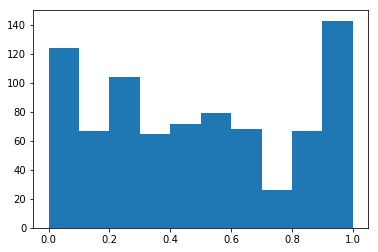

In [107]:
df["IH_mis_fre"] = ih_vector
plt.hist(df["IH_mis_fre"])

# Calculation of Hardness Instance (Mean Squared Error)

In [16]:
#have 20 versions of labels
number  = 1

train_acc1 = []
test_acc1 = []
noftree1 = []

train_acc2 = []
test_acc2 = []
noftree2 = []

train_acc3 = []
test_acc3 = []
noftree3 = []

train_acc4 = []
test_acc4 = []
noftree4 = []

train_acc1_classes = []
train_acc2_classes = []
train_acc3_classes = []
train_acc4_classes = []

train_sen1_classes = []
train_sen2_classes = []
train_sen3_classes = []
train_sen4_classes = []

train_spe1_classes = []
train_spe2_classes = []
train_spe3_classes = []
train_spe4_classes = []

test_acc1_classes = []
test_acc2_classes = []
test_acc3_classes = []
test_acc4_classes = []

test_sen1_classes = []
test_sen2_classes = []
test_sen3_classes = []
test_sen4_classes = []

test_spe1_classes = []
test_spe2_classes = []
test_spe3_classes = []
test_spe4_classes = []
  

depth = 5
noftree_s = 20
noftree_e = 40
noftree_n = noftree_e - noftree_s


cost1 = []
cost2 = []
cost3 = []
cost4 = []

all_variance = {}
for index in df.index:
    all_variance[index] = 0

while number <= 20 :
    number += 1
    
    y_all = df[['Malignancy_1', 'Malignancy_2', 'Malignancy_3', 'Malignancy_4']]
    y_all = y_all.as_matrix()
    y_allt = np.transpose(y_all)
    np.random.shuffle(y_allt)
    y_all = np.transpose(y_allt)
    y = y_all.T[0]
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

    train_indexs = []
    test_indexs = []
    

    for train_index, test_index in skf.split(X, y):  
        train_indexs.append(train_index)
        test_indexs.append(test_index)
    
    X_train = X[train_indexs[0]]
    X_test = X[test_indexs[0]]
    
    #min_max_scaler = preprocessing.MinMaxScaler()
    #min_max_scaler.fit(X_train)
    #X_train = min_max_scaler.fit_transform(X_train)
    #X_test = min_max_scaler.fit_transform(X_test)
    
    y_all_train = y_all[train_indexs[0]]
    y_all_test = y_all[test_indexs[0]]
    
    ##First Iteration

    y_train1 = np.zeros(y[train_indexs[0]].shape[0])
    y_test1 = np.zeros(y[test_indexs[0]].shape[0])
    
    #train
    n = 0
    for index in train_indexs[0]:
        y_train1[n] = y_all[index][0]
        n += 1 
     
    #test
    n = 0
    for index in test_indexs[0]:
        y_test1[n] = y_all[index][0]
        n += 1
        
    #Predction
    #Balance
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train1_balanced = sm.fit_sample(X_train, y_train1)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train1_balanced)
    noftree1.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_1 = []
    mis_test_1 = []
    
    bagging.fit(X_train_balanced,y_train1_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc1.append(accuracy_score(y_train1, bagging_train_pred))
    test_acc1.append(accuracy_score(y_test1, bagging_test_pred))
    
    #train
    cm = confusion_matrix(y_train1, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc1_classes.append(train_acc_class)
    train_sen1_classes.append(train_sen_class)
    train_spe1_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test1, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc1_classes.append(test_acc_class)
    test_sen1_classes.append(test_sen_class)
    test_spe1_classes.append(test_spe_class)  

    #calculate errors
    mis_train_error_1 = abs(y_train1 - bagging_train_pred)
    mis_test_error_1 = abs(y_test1 - bagging_test_pred)
        
    #track
    #train
    for i, j in zip(mis_train_error_1, train_indexs[0]):
        if i != 0:
            mis_train_1.append(j) 
    
    #test
    for i, j in zip(mis_test_error_1, test_indexs[0]):
        if i != 0:
            mis_test_1.append(j)

    cost1.append(len(mis_train_1)+len(mis_test_1))
    
    ##Second Iteration
    
    #Update labels
    
    y_train2 = np.zeros(y[train_indexs[0]].shape[0])
    y_test2 = np.zeros(y[test_indexs[0]].shape[0])

    #train
    n = 0
    for a, b in zip(mis_train_error_1, y_all_train):                                
        if a != 0:
            y_train2[n] = int((b[0] + b[1])/2)
        else:
            y_train2[n] = y_train1[n]
        n += 1   
    
    #test
    n = 0
    for a, b in zip(mis_test_error_1, y_all_test):                                
        if a != 0:
            y_test2[n] = int((b[0] + b[1])/2)
        else:
            y_test2[n] = y_test1[n]
        n += 1           
    
    
    #Predction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train2_balanced = sm.fit_sample(X_train, y_train2)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train2_balanced)
    noftree2.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_2 = []
    mis_test_2 = []
    
    bagging.fit(X_train_balanced,y_train2_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc2.append(accuracy_score(y_train2, bagging_train_pred))
    test_acc2.append(accuracy_score(y_test2, bagging_test_pred))
    
    #train
    cm = confusion_matrix(y_train2, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc2_classes.append(train_acc_class)
    train_sen2_classes.append(train_sen_class)
    train_spe2_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test2, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc2_classes.append(test_acc_class)
    test_sen2_classes.append(test_sen_class)
    test_spe2_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_2 = abs(y_train2 - bagging_train_pred)
    mis_test_error_2 = abs(y_test2 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_2, train_indexs[0]):
        if j not in mis_train_1:
            mis_train_error_2[c] = 0
            mis_train_error_1[c] = i
        c += 1
        
    c = 0
    for i, j in zip(mis_test_error_2, test_indexs[0]):
        if j not in mis_test_1:
            mis_test_error_2[c] = 0
            mis_test_error_1[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_2, train_indexs[0]):
        if i != 0:
            mis_train_2.append(j)
    
    #test
    for i, j in zip(mis_test_error_2, test_indexs[0]):
        if i != 0:
            mis_test_2.append(j)

    cost2.append(len(mis_train_2)+len(mis_test_2))
        
    ##Third Iteration
    
    #Update labels
    
    y_train3 = np.zeros(y[train_indexs[0]].shape[0])
    y_test3 = np.zeros(y[test_indexs[0]].shape[0])  
  
    #train
    n = 0
    for a, b, c in zip(mis_train_error_2, y_all_train, train_indexs[0]):                                
        if a != 0:
            #3 labels
            if c in mis_train_1 and c in mis_train_2:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train3[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train3[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            #2 labels
            else:
                y_train3[n] = int((b[0] + b[1])/2)
        else:
            y_train3[n] = y_train2[n]
        n += 1  
    
    #test
    n = 0
    for a, b, c in zip(mis_test_error_2, y_all_test, test_indexs[0]):                                
        if a != 0:
            #3 labels
            if c in mis_test_1 and c in mis_test_2:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test3[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test3[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            #2 labels
            else:
                y_test3[n] = int((b[0] + b[1])/2)
        else:
            y_test3[n] = y_test2[n]
        n += 1
    
    
    #Prediction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train3_balanced = sm.fit_sample(X_train, y_train3)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train3_balanced)
    noftree3.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_3 = []
    mis_test_3 = []
    
    bagging.fit(X_train_balanced,y_train3_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc3.append(accuracy_score(y_train3, bagging_train_pred))
    test_acc3.append(accuracy_score(y_test3, bagging_test_pred))

    #train
    cm = confusion_matrix(y_train3, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc3_classes.append(train_acc_class)
    train_sen3_classes.append(train_sen_class)
    train_spe3_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test3, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc3_classes.append(test_acc_class)
    test_sen3_classes.append(test_sen_class)
    test_spe3_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_3 = abs(y_train3 - bagging_train_pred)
    mis_test_error_3 = abs(y_test3 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_3, train_indexs[0]):
        if j not in mis_train_1 and j not in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_1[c] = i
        elif j not in mis_train_1 and j in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j not in mis_train_2:
            mis_train_error_3[c] = 0
            mis_train_error_2[c] = i
        c += 1
        
    c = 0
    for i, j in zip(mis_test_error_3, test_indexs[0]):
        if j not in mis_test_1 and j not in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_1[c] = i
        elif j not in mis_test_1 and j in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j not in mis_test_2:
            mis_test_error_3[c] = 0
            mis_test_error_2[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_3, train_indexs[0]):
        if i != 0:
            mis_train_3.append(j)
    
    #test
    for i, j in zip(mis_test_error_3, test_indexs[0]):
        if i != 0:
            mis_test_3.append(j)

    cost3.append(len(mis_train_3)+len(mis_test_3))

    ##Fourth Iteration
    
    #Update labels
   
    y_train4 = np.zeros(y[train_indexs[0]].shape[0])
    y_test4 = np.zeros(y[test_indexs[0]].shape[0])  

    #train
    n = 0
    for a, b, c in zip(mis_train_error_3, y_all_train, train_indexs[0]):                                
        if a != 0:
            #4 labels
            if c in mis_train_1 and c in mis_train_2 and c in mis_train_3:
                if b[3] == b[0] and b[1] == b[2]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[1] and b[0] == b[2]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[2] and b[0] == b[1]:    
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] != b[0] and b[3] != b[1] and b[3] != b[2] and b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[3]),int(b[1]), int(b[2])])
            
            # 3 labels
            elif c in mis_train_1 and c in mis_train_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
                
            #3 labels
            elif c in mis_train_2 and c in mis_train_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_train4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_train4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])

            
            #2 labels
            else:
                y_train4[n] = int((b[0] + b[1])/2)
        else:
            y_train4[n] = y_train3[n]
        
        n += 1  

    
    #test
    n = 0
    for a, b, c in zip(mis_test_error_3, y_all_test, test_indexs[0]):                                
        if a != 0:
            #4 labels
            if c in mis_test_1 and c in mis_test_2 and c in mis_test_3:
                if b[3] == b[0] and b[1] == b[2]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[1] and b[0] == b[2]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] == b[2] and b[0] == b[1]:    
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                elif b[3] != b[0] and b[3] != b[1] and b[3] != b[2] and b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[3] + b[0] + b[1] + b[2])/4)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[3]),int(b[1]), int(b[2])])

            # 3 labels
            elif c in mis_test_1 and c in mis_test_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
                
            #3 labels
            elif c in mis_test_2 and c in mis_test_3:
                if b[0] != b[1] and b[0] != b[2] and b[1] != b[2]:
                    y_test4[n] = int((b[0] + b[1] + b[2])/3)
                else:
                    y_test4[n] = statistics.mode([int(b[0]),int(b[1]),int(b[2])])
            
            #2 labels
            else:
                y_test4[n] = int((b[0] + b[1])/2)
        else:
            y_test4[n] = y_test3[n]
        
        n += 1  
   
    #Prediction
    #Balanced
    sm = SMOTE(random_state=2)
    X_train_balanced, y_train4_balanced = sm.fit_sample(X_train, y_train4)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632)
    
    parameters = {
        'n_estimators': np.array([int(e) for e in np.linspace(noftree_s,noftree_e,noftree_n)]),
    }
    gs = GridSearchCV(bagging, parameters, cv=10)
    gs.fit(X_train_balanced, y_train4_balanced)
    noftree4.append(gs.best_params_)
    
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth = depth), max_samples = 0.632, n_estimators = gs.best_params_["n_estimators"])
    
    mis_train_4 = []
    mis_test_4 = []
    
    bagging.fit(X_train_balanced,y_train4_balanced)
    bagging_train_pred = bagging.predict(X_train)
    bagging_test_pred = bagging.predict(X_test)
    train_acc4.append(accuracy_score(y_train4, bagging_train_pred))
    test_acc4.append(accuracy_score(y_test4, bagging_test_pred))

    #train
    cm = confusion_matrix(y_train4, bagging_train_pred, labels=[1, 2, 3, 4, 5])
    train_acc_class = []
    train_sen_class = []
    train_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        train_acc_class.append(accuracy)
        train_sen_class.append(sensitivity)
        train_spe_class.append(specificity)
        
    train_acc4_classes.append(train_acc_class)
    train_sen4_classes.append(train_sen_class)
    train_spe4_classes.append(train_spe_class)
    
    #test
    cm = confusion_matrix(y_test4, bagging_test_pred, labels=[1, 2, 3, 4, 5])
    test_acc_class = []
    test_sen_class = []
    test_spe_class = []
    
    for i in range(5):  
        TP = cm[i][i]
        FN = cm[i].sum() - TP
        FP = cm.T[i].sum() - TP
        TN = cm.sum() - TP - FN - FP
        accuracy = (TP+TN)/cm.sum()
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        
        test_acc_class.append(accuracy)
        test_sen_class.append(sensitivity)
        test_spe_class.append(specificity)
        
    test_acc4_classes.append(test_acc_class)
    test_sen4_classes.append(test_sen_class)
    test_spe4_classes.append(test_spe_class)  
    
    #calculate errors
    mis_train_error_4 = abs(y_train4 - bagging_train_pred)
    mis_test_error_4 = abs(y_test4 - bagging_test_pred)
    
    c = 0
    for i, j in zip(mis_train_error_4, train_indexs[0]):
        if j not in mis_train_1 and j not in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_1[c] = i
        elif j in mis_train_1 and j not in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j not in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j in mis_train_2 and j not in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j not in mis_train_1 and j in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        elif j in mis_train_1 and j not in mis_train_2 and j in mis_train_3:
            mis_train_error_4[c] = 0
            mis_train_error_2[c] = i
        c += 1
     
    c = 0
    for i, j in zip(mis_test_error_4, test_indexs[0]):
        if j not in mis_test_1 and j not in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_1[c] = i
        elif j in mis_test_1 and j not in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j not in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j in mis_test_2 and j not in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j not in mis_test_1 and j in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        elif j in mis_test_1 and j not in mis_test_2 and j in mis_test_3:
            mis_test_error_4[c] = 0
            mis_test_error_2[c] = i
        c += 1
        
    #track
    #train
    for i, j in zip(mis_train_error_4, train_indexs[0]):
        if i != 0:
            mis_train_4.append(j)
    
    #test
    for i, j in zip(mis_test_error_4, test_indexs[0]):
        if i != 0:
            mis_test_4.append(j)
        
    cost4.append(len(mis_train_4)+len(mis_test_4))  
    
    #Weighted Mean Squared Error
    wmse_train = {}
    for index, one, two, three, four in zip(train_indexs[0], mis_train_error_1, mis_train_error_2, mis_train_error_3, mis_train_error_4):
        wmse_train[index] = one**2 * (1/10) + two**2 * (2/10) + three**2 * (3/10) + four**2 * (4/10)
        
    wmse_test = {}
    for index, one, two, three, four in zip(test_indexs[0], mis_test_error_1, mis_test_error_2, mis_test_error_3, mis_test_error_4):
        wmse_test[index] = one**2 * (1/10) + two**2 * (2/10) + three**2 * (3/10) + four**2 * (4/10)

    for key, value in wmse_train.items():
        all_variance[key] = all_variance[key] + value
        
    for key, value in wmse_test.items():
        all_variance[key] = all_variance[key] + value
        
    print(number)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


# Performance

In [17]:
ave_acc1 = sum(train_acc1)/len(train_acc1)
ave_acc2 = sum(train_acc2)/len(train_acc2)
ave_acc3 = sum(train_acc3)/len(train_acc3)
ave_acc4 = sum(train_acc4)/len(train_acc4)

print(ave_acc1, ave_acc2, ave_acc3, ave_acc4)

0.64383469219 0.678606640671 0.71098156682 0.731585017133


In [18]:
#Accuracy

ave_acc1 = sum(test_acc1)/len(test_acc1)
ave_acc2 = sum(test_acc2)/len(test_acc2)
ave_acc3 = sum(test_acc3)/len(test_acc3)
ave_acc4 = sum(test_acc4)/len(test_acc4)

print(ave_acc1, ave_acc2, ave_acc3, ave_acc4)

0.461990022173 0.537505543237 0.582176644494 0.621644493718


In [31]:
#Iteration 1 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_sen1_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration1 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 2 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_sen2_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration2 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 3 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_sen3_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration3 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 4 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_sen4_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration4 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

Iteration1 sensitivity class1 0.76603674532 class2 0.754717248771 class3 0.480902512347 class1 0.619206956102 class1 0.817907194916
Iteration2 sensitivity class1 0.826406669628 class2 0.71151311593 class3 0.514770780689 class1 0.736315634355 class1 0.886806342825
Iteration3 sensitivity class1 0.890993184687 class2 0.77507504341 class3 0.510297139975 class1 0.758364087975 class1 0.868344188908
Iteration4 sensitivity class1 0.882596840574 class2 0.754436643029 class3 0.566063615647 class1 0.769538993811 class1 0.857269388781


In [27]:
# Iteration 1 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in test_sen1_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration1 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class4", sum(class4)/len(class4), "class5", sum(class5)/len(class5))

#Iteration 2 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in test_sen2_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration2 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class4", sum(class4)/len(class4), "class5", sum(class5)/len(class5))

#Iteration 3 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in test_sen3_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration3 sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class4", sum(class4)/len(class4), "class5", sum(class5)/len(class5))

#Iteration 4 Sensitivity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in test_sen4_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration4 test sensitivity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class4", sum(class4)/len(class4), "class5", sum(class5)/len(class5))

Iteration1 sensitivity class1 0.712049450549 class2 0.448856715367 class3 0.303694400837 class4 0.344448260073 class5 0.710636645963
Iteration2 sensitivity class1 0.769362020829 class2 0.498409868357 class3 0.343578825134 class4 0.589056656497 class5 0.823138301972
Iteration3 sensitivity class1 0.794635450437 class2 0.658145116512 class3 0.384946631251 class4 0.656142239614 class5 0.810911118643
Iteration4 test sensitivity class1 0.796136752137 class2 0.649061389504 class3 0.408005848968 class4 0.697159853344 class5 0.817536723968


In [21]:
#Iteration 1 Specificity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_spe1_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration1 specificity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 2 Specificity 
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_spe2_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration2 specificity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 3 Specificity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_spe3_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration3 specificity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

#Iteration 4 Specificity
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for I in train_spe4_classes:
    class1.append(I[0])
    class2.append(I[1])
    class3.append(I[2])
    class4.append(I[3])
    class5.append(I[4])
    
print("Iteration4 specificity", "class1", sum(class1)/len(class1), "class2", sum(class2)/len(class2),
      "class3", sum(class3)/len(class3), "class1", sum(class4)/len(class4), "class1", sum(class5)/len(class5))

Iteration1 specificity class1 0.979350073315 class2 0.856795549359 class3 0.898942373225 class1 0.901369913871 class1 0.91267967733
Iteration2 specificity class1 0.985399121992 class2 0.884872238765 class3 0.908341513812 class1 0.883035039113 class1 0.930085575452
Iteration3 specificity class1 0.988355247359 class2 0.889813239371 class3 0.918938095919 class1 0.890344766264 class1 0.938823236666
Iteration4 specificity class1 0.988360577242 class2 0.897498844516 class3 0.917546833491 class1 0.90076855233 class1 0.944434094882


In [20]:
#IH
for key, value in all_variance.items():
    all_variance[key] = all_variance[key]/20

In [21]:
print("\n", "cost", int(815 + sum(cost1)/len(cost1) + sum(cost2)/len(cost2) + sum(cost3)/len(cost3)))


 cost 1507


# Add IH into dataset

In [22]:
df['IH'] = 0
for key, value in all_variance.items():
    df.loc[key,'IH'] = value

In [46]:
df['IH'] = 0

for key, value in all_count.items():
    df.loc[key,'IH'] = value

In [23]:
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_2,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,IH
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,5,4,3,3,3,3,3,2,0.100
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,5,3,4,3,3,2,3,3,2,0.120
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,4,3,2,3,3,2,1,3,3,0.015
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,5,3,2,3,3,2,1,3,1,1.370
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,1,3,0.030


# Analysis

In [26]:
reshape_IH = np.reshape(df["IH"].as_matrix(), (df["IH"].as_matrix().shape[0], 1))
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(reshape_IH)
IH_norm = min_max_scaler.fit_transform(reshape_IH)

In [27]:
df["IH_norm"] = IH_norm

In [30]:
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,IH,IH_norm
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,4,3,3,3,3,3,2,0.100,0.009204
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,3,4,3,3,2,3,3,2,0.120,0.011045
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,3,2,3,3,2,1,3,3,0.015,0.001381
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,3,2,3,3,2,1,3,1,1.370,0.126093
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,3,0.030,0.002761


(array([ 722.,   65.,   19.,    4.,    0.,    3.,    1.,    0.,    0.,    1.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

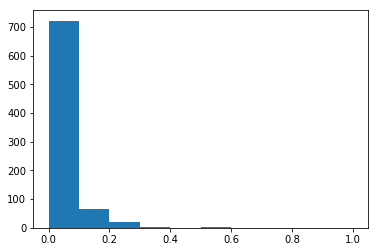

In [29]:
plt.hist(df["IH_norm"])

In [52]:
df["IH"] = df["IH"].as_matrix()/sum(df["IH"].as_matrix())
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_2,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,IH
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,5,4,3,3,3,3,3,2,0.000061
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,5,3,4,3,3,2,3,3,2,0.000791
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,4,3,2,3,3,2,1,3,3,0.000183
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,5,3,2,3,3,2,1,3,1,0.002983
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,1,3,0.000487


(array([ 256.,  147.,  136.,   97.,   64.,   45.,   30.,   17.,   14.,    9.]),
 array([ 0.        ,  0.00048706,  0.00097412,  0.00146119,  0.00194825,
         0.00243531,  0.00292237,  0.00340944,  0.0038965 ,  0.00438356,
         0.00487062]),
 <a list of 10 Patch objects>)

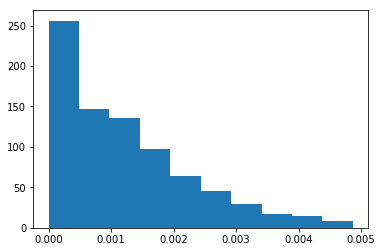

In [53]:
plt.hist(df["IH"])

(array([ 238.,  201.,  240.,   82.,   24.,   16.,    7.,    3.,    2.,
           1.,    1.]),
 array([ 0.  ,  0.05,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,
         0.8 ,  0.9 ,  1.  ]),
 <a list of 11 Patch objects>)

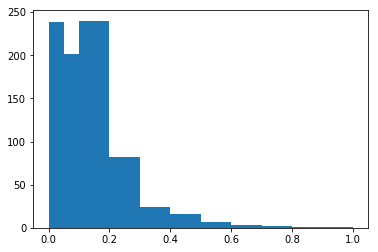

In [77]:
plt.hist(df["IH"],bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [96]:
df["IH"] = IH_norm
df.drop(['IH_norm'], inplace = True, axis=1)
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_2,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,IH
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,5,4,3,3,3,3,3,2,0.000000
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,5,3,4,3,3,2,3,3,2,0.173866
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,4,3,2,3,3,2,1,3,3,0.005670
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,5,3,2,3,3,2,1,3,1,0.160614
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,1,3,0.028351


In [31]:
df.to_csv("LIDC with IH(MSE).csv"

In [32]:
df = pd.read_csv("LIDC with IH Right.csv", index_col = "noduleID")

In [33]:
df.head()

,Unnamed: 0,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Malignancy_2,Malignancy_3,Malignancy_4,Malignancy3_1,Malignancy3_2,Malignancy3_3,Malignancy3_4,Malignancy3_mode,Propagation,IH
noduleID,,,,,,,,,,,,,,,,,,,,,
1,0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,5,5,4,3,3,3,3,3,5,0.063571
3,1,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,5,3,4,3,3,2,3,3,5,0.082643
4,2,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,4,3,2,3,3,2,1,3,3,0.334286
5,3,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,5,3,2,3,3,2,1,3,3,0.157500
6,4,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,1,1,1,1,1,1,1,1,2,0.267429


In [34]:
df_all_ratings = pd.read_csv("LIDC_20130817_AllFeatures2D_MaxSlicePerNodule_inLineRatings.csv", index_col = "noduleID")

In [35]:
df_all_ratings = df_all_ratings[["Subtlety_1", "Subtlety_2", "Subtlety_3", "Subtlety_4", "InternalStructure_1", 
               "InternalStructure_2", "InternalStructure_3", "InternalStructure_4", "Calcification_1",
               "Calcification_2", "Calcification_3", "Calcification_4", "Sphericity_1", "Sphericity_2",
               "Sphericity_3", "Sphericity_4", "Margin_1", "Margin_2", "Margin_3", "Margin_4", "Lobulation_1",
               "Lobulation_2", "Lobulation_3", "Lobulation_4", "Spiculation_1", "Spiculation_2",
               "Spiculation_3", "Spiculation_4", "Texture_1", "Texture_2", "Texture_3", "Texture_4", "Malignancy_1",
               "Malignancy_2", "Malignancy_3", "Malignancy_4"]]

In [36]:
def entropy(labels):
    value,counts = np.unique(labels, return_counts=True)
    return stats.entropy(counts)

In [155]:
# Seperate data into an easy group and a hard group
hardID = []
easyID = []
for index, row in df.iterrows():
    if row['IH'] > 0.557142857:
        hardID.append(index)
    elif row['IH'] == 0:
        easyID.append(index)

In [130]:
len(hardID)

42

In [156]:
easyID = random.choices(easyID, k=42)

In [157]:
len(easyID)

42

In [158]:
# hard
Subtlety_hard_var = []
InternalStructure_hard_var = []
Calcification_hard_var = []
Sphericity_hard_var = []
Margin_hard_var = []
Lobulation_hard_var = []
Spiculation_hard_var = []
Texture_hard_var = []
Malignancy_hard_var = []

for i in hardID:
    #Subtlety
    Su_1 = df_all_ratings.loc[i]["Subtlety_1"]
    Su_2 = df_all_ratings.loc[i]["Subtlety_2"]
    Su_3 = df_all_ratings.loc[i]["Subtlety_3"]
    Su_4 = df_all_ratings.loc[i]["Subtlety_4"]
    
    Subtlety = np.array([Su_1, Su_2, Su_3, Su_4])
    Subtlety_hard_var.append(entropy(Subtlety))
    
    #InternalStructure
    IS_1 = df_all_ratings.loc[i]["InternalStructure_1"]
    IS_2 = df_all_ratings.loc[i]["InternalStructure_2"]
    IS_3 = df_all_ratings.loc[i]["InternalStructure_3"]
    IS_4 = df_all_ratings.loc[i]["InternalStructure_4"]
    
    InternalStructure = np.array([IS_1, IS_2, IS_3, IS_4])
    InternalStructure_hard_var.append(entropy(InternalStructure_hard_var))
    
    #Calcification
    Ca_1 = df_all_ratings.loc[i]["Calcification_1"]
    Ca_2 = df_all_ratings.loc[i]["Calcification_2"]
    Ca_3 = df_all_ratings.loc[i]["Calcification_3"]
    Ca_4 = df_all_ratings.loc[i]["Calcification_4"]
    
    Calcification = np.array([Ca_1, Ca_2, Ca_3, Ca_4])
    Calcification_hard_var.append(entropy(Calcification))
    
    #Sphericity
    Sp_1 = df_all_ratings.loc[i]["Sphericity_1"]
    Sp_2 = df_all_ratings.loc[i]["Sphericity_2"]
    Sp_3 = df_all_ratings.loc[i]["Sphericity_3"]
    Sp_4 = df_all_ratings.loc[i]["Sphericity_4"]
    
    Sphericity = np.array([Sp_1, Sp_2, Sp_3, Sp_4])
    Sphericity_hard_var.append(entropy(Sphericity))
    
    #Margin
    Ma_1 = df_all_ratings.loc[i]["Margin_1"]
    Ma_2 = df_all_ratings.loc[i]["Margin_2"]
    Ma_3 = df_all_ratings.loc[i]["Margin_3"]
    Ma_4 = df_all_ratings.loc[i]["Margin_4"]
    
    Margin = np.array([Ma_1, Ma_2, Ma_3, Ma_4])
    Margin_hard_var.append(entropy(Margin))
    
    #Lobulation
    Lo_1 = df_all_ratings.loc[i]["Lobulation_1"]
    Lo_2 = df_all_ratings.loc[i]["Lobulation_2"]
    Lo_3 = df_all_ratings.loc[i]["Lobulation_3"]
    Lo_4 = df_all_ratings.loc[i]["Lobulation_4"]
    
    Lobulation = np.array([Lo_1, Lo_2, Lo_3, Lo_4])
    Lobulation_hard_var.append(entropy(Lobulation))
    
    #Spiculation
    Spi_1 = df_all_ratings.loc[i]["Spiculation_1"]
    Spi_2 = df_all_ratings.loc[i]["Spiculation_2"]
    Spi_3 = df_all_ratings.loc[i]["Spiculation_3"]
    Spi_4 = df_all_ratings.loc[i]["Spiculation_4"]
    
    Spiculation = np.array([Spi_1, Spi_2, Spi_3, Spi_4])
    Spiculation_hard_var.append(entropy(Spiculation))
    
    #Texture
    Te_1 = df_all_ratings.loc[i]["Texture_1"]
    Te_2 = df_all_ratings.loc[i]["Texture_2"]
    Te_3 = df_all_ratings.loc[i]["Texture_3"]
    Te_4 = df_all_ratings.loc[i]["Texture_4"]
    
    Texture = np.array([Te_1, Te_2, Te_3, Te_4])
    Texture_hard_var.append(entropy(Texture))
    
    
    #Malignancy
    Mal_1 = df_all_ratings.loc[i]["Malignancy_1"]
    Mal_2 = df_all_ratings.loc[i]["Malignancy_2"]
    Mal_3 = df_all_ratings.loc[i]["Malignancy_3"]
    Mal_4 = df_all_ratings.loc[i]["Malignancy_4"]
    
    Malignancy = np.array([Mal_1, Mal_2, Mal_3, Mal_4])
    Malignancy_hard_var.append(entropy(Malignancy))

In [82]:
easyID.remove(1727)
easyID.remove(1725)
easyID.remove(2214)

In [159]:
# easy
Subtlety_easy_var = []
InternalStructure_easy_var = []
Calcification_easy_var = []
Sphericity_easy_var = []
Margin_easy_var = []
Lobulation_easy_var = []
Spiculation_easy_var = []
Texture_easy_var = []
Malignancy_easy_var = []

for i in easyID:
    #Subtlety
    Su_1 = df_all_ratings.loc[i]["Subtlety_1"]
    Su_2 = df_all_ratings.loc[i]["Subtlety_2"]
    Su_3 = df_all_ratings.loc[i]["Subtlety_3"]
    Su_4 = df_all_ratings.loc[i]["Subtlety_4"]
    
    Subtlety = np.array([Su_1, Su_2, Su_3, Su_4])
    Subtlety_easy_var.append(entropy(Subtlety))
    
    #InternalStructure
    IS_1 = df_all_ratings.loc[i]["InternalStructure_1"]
    IS_2 = df_all_ratings.loc[i]["InternalStructure_2"]
    IS_3 = df_all_ratings.loc[i]["InternalStructure_3"]
    IS_4 = df_all_ratings.loc[i]["InternalStructure_4"]
    
    InternalStructure = np.array([IS_1, IS_2, IS_3, IS_4])
    InternalStructure_easy_var.append(entropy(InternalStructure))
    
    #Calcification
    Ca_1 = df_all_ratings.loc[i]["Calcification_1"]
    Ca_2 = df_all_ratings.loc[i]["Calcification_2"]
    Ca_3 = df_all_ratings.loc[i]["Calcification_3"]
    Ca_4 = df_all_ratings.loc[i]["Calcification_4"]
    
    Calcification = np.array([Ca_1, Ca_2, Ca_3, Ca_4])
    Calcification_easy_var.append(entropy(Calcification))
    
    #Sphericity
    Sp_1 = df_all_ratings.loc[i]["Sphericity_1"]
    Sp_2 = df_all_ratings.loc[i]["Sphericity_2"]
    Sp_3 = df_all_ratings.loc[i]["Sphericity_3"]
    Sp_4 = df_all_ratings.loc[i]["Sphericity_4"]
    
    Sphericity = np.array([Sp_1, Sp_2, Sp_3, Sp_4])
    Sphericity_easy_var.append(entropy(Sphericity))
    
    #Margin
    Ma_1 = df_all_ratings.loc[i]["Margin_1"]
    Ma_2 = df_all_ratings.loc[i]["Margin_2"]
    Ma_3 = df_all_ratings.loc[i]["Margin_3"]
    Ma_4 = df_all_ratings.loc[i]["Margin_4"]
    
    Margin = np.array([Ma_1, Ma_2, Ma_3, Ma_4])
    Margin_easy_var.append(entropy(Margin))
    
    #Lobulation
    Lo_1 = df_all_ratings.loc[i]["Lobulation_1"]
    Lo_2 = df_all_ratings.loc[i]["Lobulation_2"]
    Lo_3 = df_all_ratings.loc[i]["Lobulation_3"]
    Lo_4 = df_all_ratings.loc[i]["Lobulation_4"]
    
    Lobulation = np.array([Lo_1, Lo_2, Lo_3, Lo_4])
    Lobulation_easy_var.append(entropy(Lobulation))
    
    #Spiculation
    Spi_1 = df_all_ratings.loc[i]["Spiculation_1"]
    Spi_2 = df_all_ratings.loc[i]["Spiculation_2"]
    Spi_3 = df_all_ratings.loc[i]["Spiculation_3"]
    Spi_4 = df_all_ratings.loc[i]["Spiculation_4"]
    
    Spiculation = np.array([Spi_1, Spi_2, Spi_3, Spi_4])
    Spiculation_easy_var.append(entropy(Spiculation))
    
    #Texture
    Te_1 = df_all_ratings.loc[i]["Texture_1"]
    Te_2 = df_all_ratings.loc[i]["Texture_2"]
    Te_3 = df_all_ratings.loc[i]["Texture_3"]
    Te_4 = df_all_ratings.loc[i]["Texture_4"]
    
    Texture = np.array([Te_1, Te_2, Te_3, Te_4])
    Texture_easy_var.append(entropy(Texture))
    
    
    #Malignancy
    Mal_1 = df_all_ratings.loc[i]["Malignancy_1"]
    Mal_2 = df_all_ratings.loc[i]["Malignancy_2"]
    Mal_3 = df_all_ratings.loc[i]["Malignancy_3"]
    Mal_4 = df_all_ratings.loc[i]["Malignancy_4"]
    
    Malignancy = np.array([Mal_1, Mal_2, Mal_3, Mal_4])
    Malignancy_easy_var.append(entropy(Malignancy))

In [134]:
stats.ttest_ind(Subtlety_easy_var, Subtlety_hard_var, equal_var = False)

Ttest_indResult(statistic=1.4751529252986935, pvalue=0.14687448984717852)

In [135]:
print(sum(Subtlety_easy_var)/len(Subtlety_easy_var), sum(Subtlety_hard_var)/len(Subtlety_hard_var))

0.69071057588 0.610307015413


In [136]:
stats.ttest_ind(InternalStructure_easy_var, InternalStructure_hard_var, equal_var = False)

Ttest_indResult(statistic=3.4731004791216309, pvalue=0.00054313446676465549)

In [162]:
print(sum(InternalStructure_easy_var)/len(InternalStructure_easy_var), sum(InternalStructure_hard_var)/len(InternalStructure_hard_var))

0.0267778640295 0.0


In [138]:
stats.ttest_ind(Calcification_easy_var, Calcification_hard_var, equal_var = False)

Ttest_indResult(statistic=-2.6118221649803246, pvalue=0.012363621838003448)

In [139]:
print(sum(Calcification_easy_var)/len(Calcification_easy_var), sum(Calcification_hard_var)/len(Calcification_hard_var))

0.100663392101 0.252528422525


In [140]:
stats.ttest_ind(Sphericity_easy_var, Sphericity_hard_var, equal_var = False)

Ttest_indResult(statistic=-1.231694665121466, pvalue=0.22405611200694375)

In [141]:
print(sum(Sphericity_easy_var)/len(Sphericity_easy_var), sum(Sphericity_hard_var)/len(Sphericity_hard_var))

0.758554169176 0.808349067001


In [142]:
stats.ttest_ind(Margin_easy_var, Margin_hard_var, equal_var = False)

Ttest_indResult(statistic=2.9534167845897912, pvalue=0.0049812418324343428)

In [143]:
print(sum(Margin_easy_var)/len(Margin_easy_var), sum(Margin_hard_var)/len(Margin_hard_var))

0.664273503574 0.481393553305


In [144]:
stats.ttest_ind(Lobulation_easy_var, Lobulation_hard_var, equal_var = False)

Ttest_indResult(statistic=0.67189806703183175, pvalue=0.50503657474247943)

In [145]:
print(sum(Lobulation_easy_var)/len(Lobulation_easy_var), sum(Lobulation_hard_var)/len(Lobulation_hard_var))

0.608761857744 0.567025647084


In [146]:
stats.ttest_ind(Spiculation_easy_var, Spiculation_hard_var, equal_var = False)

Ttest_indResult(statistic=-0.15477869288582716, pvalue=0.87767724077552933)

In [147]:
print(sum(Spiculation_easy_var)/len(Spiculation_easy_var), sum(Spiculation_hard_var)/len(Spiculation_hard_var))

0.501641565364 0.511285989619


In [148]:
stats.ttest_ind(Texture_easy_var, Texture_hard_var, equal_var = False)

Ttest_indResult(statistic=4.4366636899189213, pvalue=4.870006175691751e-05)

In [149]:
print(sum(Texture_easy_var)/len(Texture_easy_var), sum(Texture_hard_var)/len(Texture_hard_var))

0.305460331267 0.126729532701


In [150]:
stats.ttest_ind(Malignancy_easy_var, Malignancy_hard_var, equal_var = False)

Ttest_indResult(statistic=5.5688396578176214, pvalue=1.3730099328140923e-06)

In [165]:
print(sum(Malignancy_easy_var)/len(Malignancy_easy_var), sum(Malignancy_hard_var)/len(Malignancy_hard_var))

0.672275817447 0.41740214369
